# Explore here

In [4]:
import pandas as pd

#TODO 1: Data Collection

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#TODO 2: Exploration and data cleaning
total_data.shape


(97790, 16)

In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97790 entries, 0 to 97789
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              97790 non-null  int64  
 1   name                            97758 non-null  object 
 2   host_id                         97790 non-null  int64  
 3   host_name                       97748 non-null  object 
 4   neighbourhood_group             97790 non-null  object 
 5   neighbourhood                   97790 non-null  object 
 6   latitude                        97790 non-null  float64
 7   longitude                       97790 non-null  float64
 8   room_type                       97790 non-null  object 
 9   price                           97790 non-null  int64  
 10  minimum_nights                  97790 non-null  int64  
 11  number_of_reviews               97790 non-null  int64  
 12  last_review                     

In [7]:
total_data.drop("id", axis=1).duplicated().sum()

np.int64(48895)

In [8]:
total_data = total_data.drop_duplicates(subset=total_data.columns.difference(['id']))
print(total_data.shape)
total_data.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
total_data.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'], axis=1, inplace=True)
total_data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [11]:
total_data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
total_data = total_data.dropna(subset=['reviews_per_month'])

In [13]:
total_data.shape
total_data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

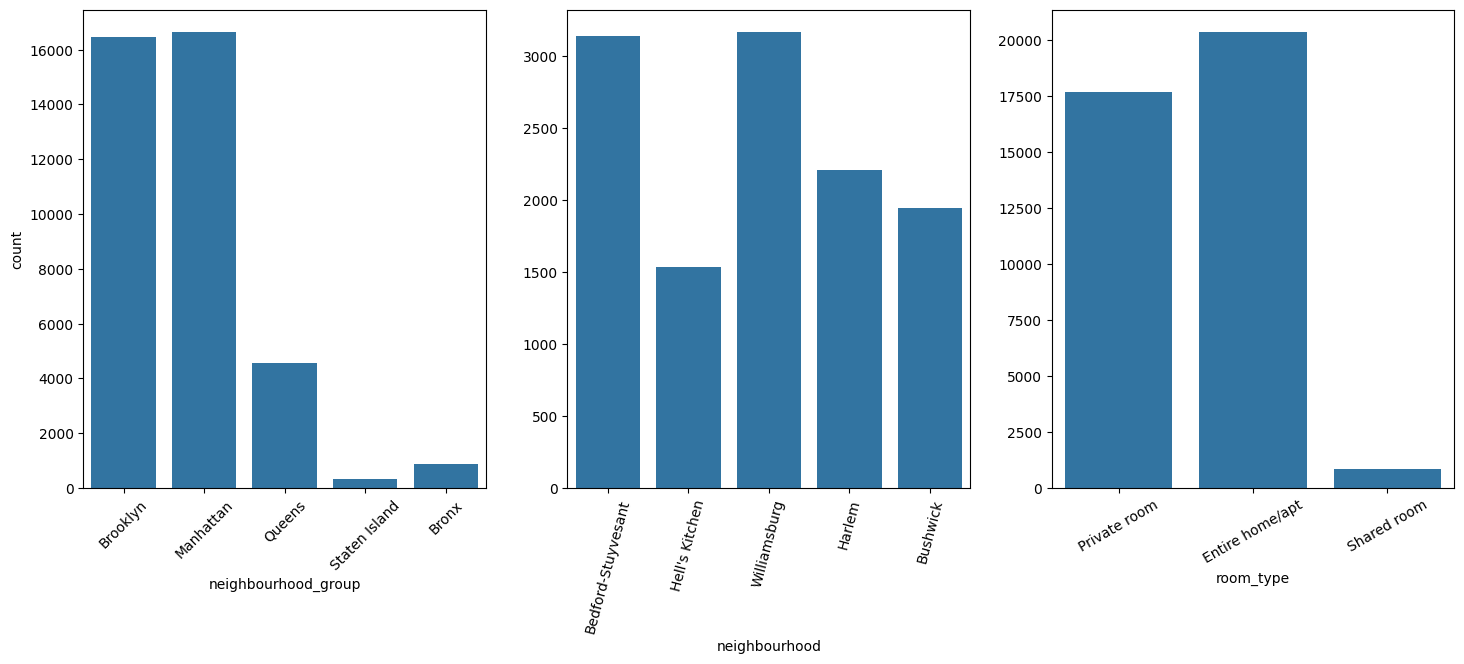

In [14]:
#TODO 3: Analysis of univariate variable.
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (15, 7), ncols=3)

top_neigh = total_data["neighbourhood"].value_counts().nlargest(5).index
filtered = total_data[total_data["neighbourhood"].isin(top_neigh)]

# Create Histogram (multiple)
sns.countplot(ax=axis[0], data=total_data, x="neighbourhood_group")
sns.countplot(ax=axis[1], data=filtered, x="neighbourhood").set_ylabel(None)
sns.countplot(ax=axis[2], data=total_data, x="room_type").set_ylabel(None)

axis[0].tick_params(axis='x', rotation=45)
axis[1].tick_params(axis='x', rotation=75)
axis[2].tick_params(axis='x', rotation=30)


plt.tight_layout(pad=2.0)
plt.show()

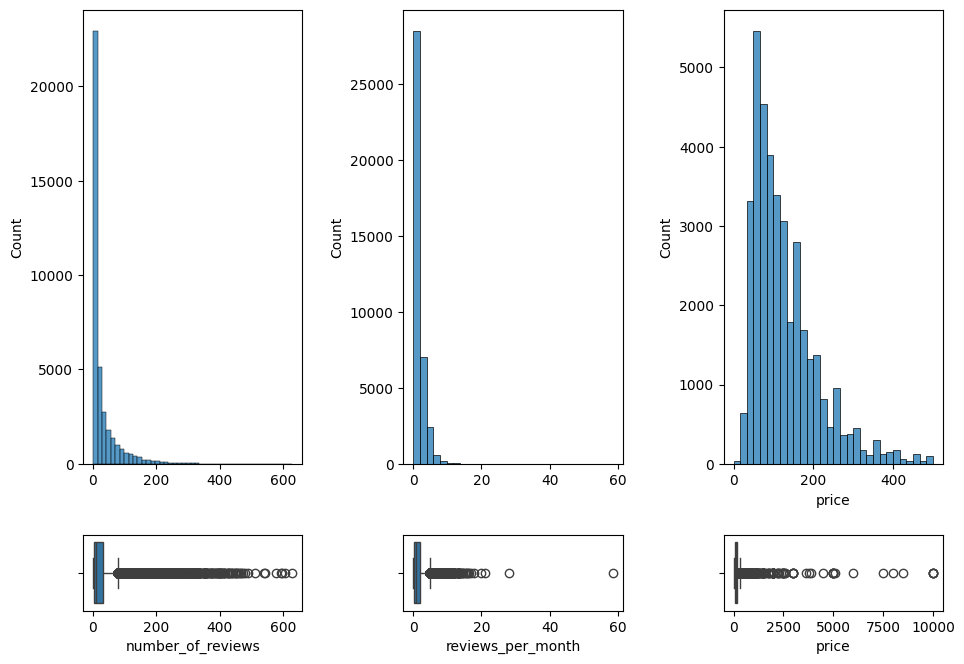

In [15]:
#TODO 3 (continued): Analysis on numeric variable.
fig, axis = plt.subplots(2, 3, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax=axis[0, 0], data=total_data, x="number_of_reviews", bins=45).set_xlabel(None)
sns.boxplot(ax=axis[1, 0], data=total_data, x="number_of_reviews")

sns.histplot(ax=axis[0, 1], data=total_data, x="reviews_per_month", bins=30).set_xlabel(None)
sns.boxplot(ax=axis[1, 1], data=total_data, x="reviews_per_month")

sns.histplot(ax=axis[0, 2], data=total_data[total_data['price'] < 500], x="price", bins=30)
sns.boxplot(ax=axis[1, 2], data=total_data, x="price")

plt.tight_layout(pad=2.0)
plt.show()

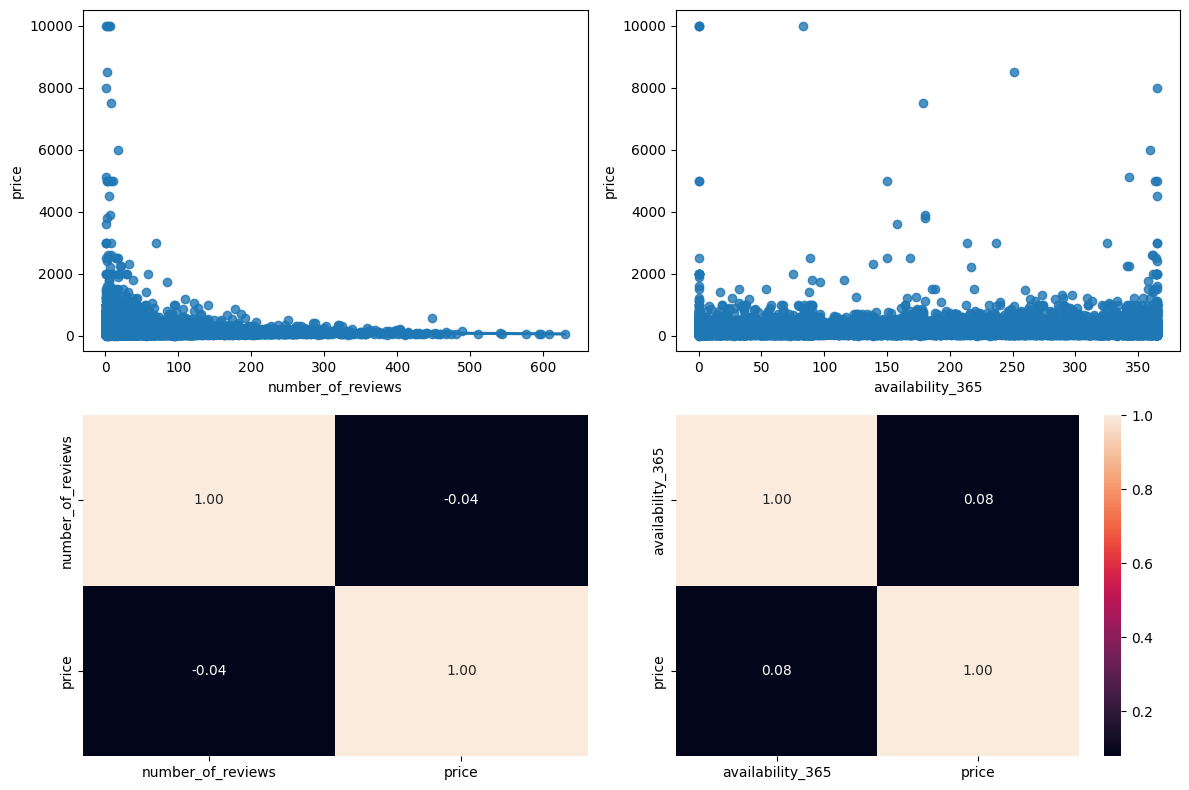

In [16]:
#TODO 4: Analysis of multivariate variables.
fig, axis = plt.subplots(2, 2, figsize=(12, 8))

sns.regplot(ax=axis[0, 0], data=total_data, x='number_of_reviews', y='price')
sns.heatmap(ax=axis[1, 0], data=total_data[['number_of_reviews', 'price']].corr(), annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=total_data, x='availability_365', y='price')
sns.heatmap(ax=axis[1, 1], data=total_data[['availability_365', 'price']].corr(), annot=True, fmt=".2f", cbar=True)

plt.tight_layout()
plt.show()

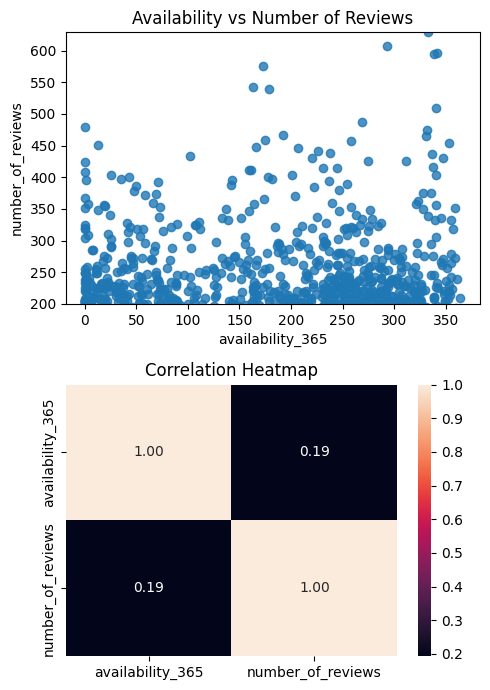

In [17]:
#TODO 4 (Continued): number_of_reviews VS availability_365
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax=axis[0], data=total_data, x='availability_365', y='number_of_reviews')
axis[0].set_ylim(200, total_data['number_of_reviews'].max())
axis[0].set_title("Availability vs Number of Reviews")

sns.heatmap(ax=axis[1], data=total_data[['availability_365', 'number_of_reviews']].corr(), annot=True, fmt='.2f', cbar=True)
axis[1].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()

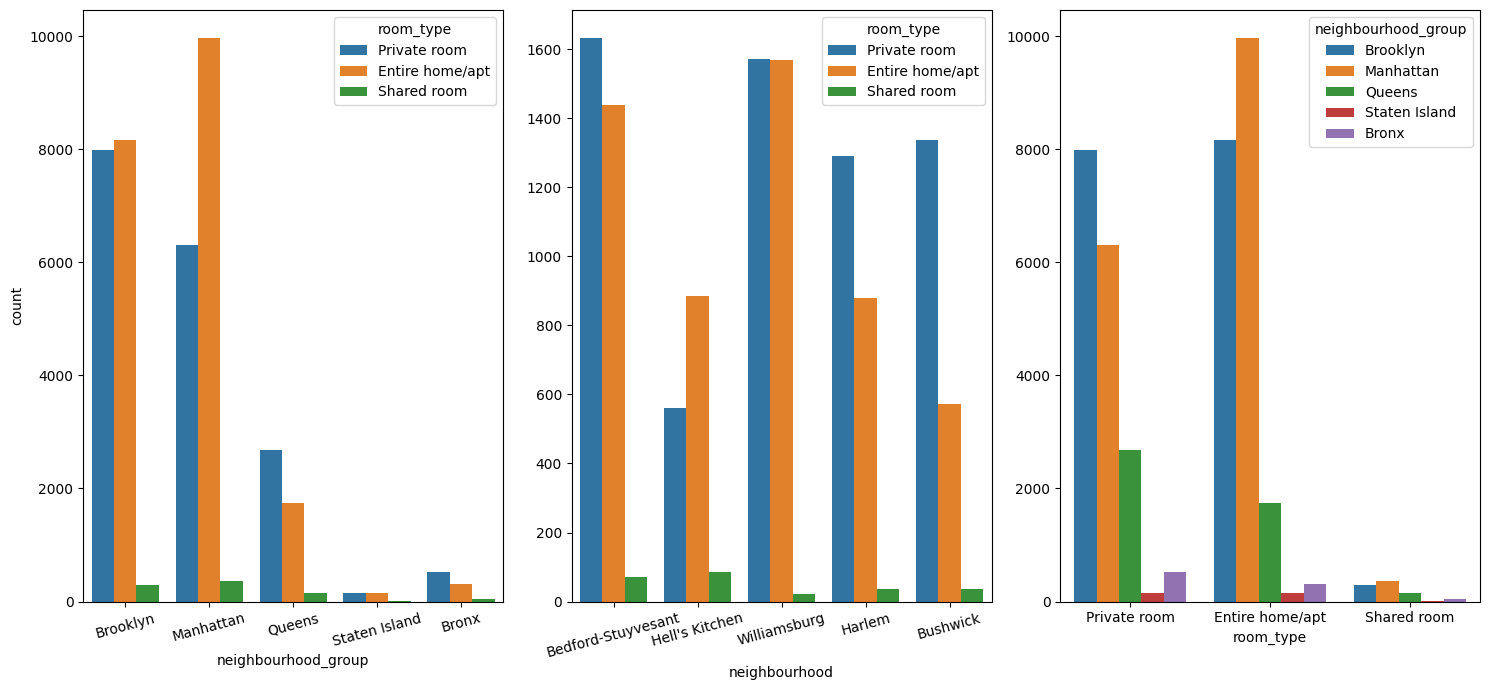

In [18]:
#TODO Categorical - Categorial Analysis:
room_palette = {
    'Private room': '#1f77b4',     # deep blue
    'Entire home/apt': '#ff7f0e', # strong orange
    'Shared room': '#2ca02c'      # rich green
}

fig, axis = plt.subplots(1, 3, figsize=(15, 7))

sns.countplot(ax=axis[0], data=total_data, x='neighbourhood_group', hue='room_type', palette=room_palette)
axis[0].tick_params(axis='x', rotation=15)

sns.countplot(ax=axis[1], data=filtered, x='neighbourhood', hue='room_type', palette=room_palette).set_ylabel(None)
axis[1].tick_params(axis='x', rotation=15)

sns.countplot(ax=axis[2], data=total_data, x='room_type', hue='neighbourhood_group').set_ylabel(None)

plt.tight_layout()
plt.show()

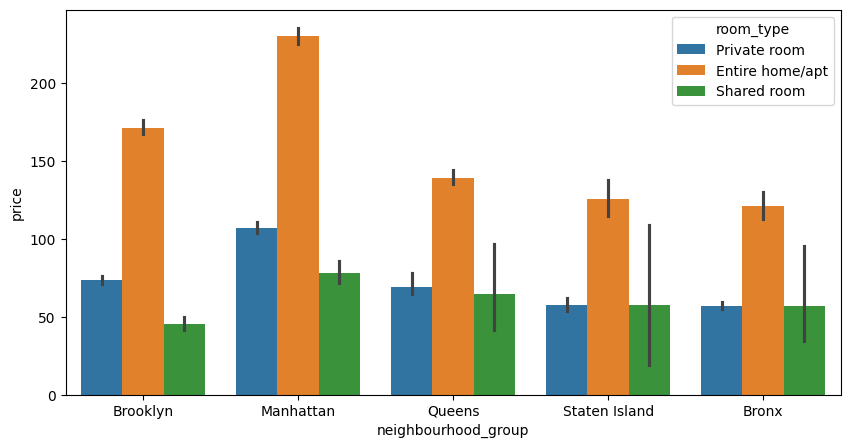

In [19]:
#TODO Combinations Analysis:
fig, axis = plt.subplots(figsize=(10, 5))

sns.barplot(data=total_data, x='neighbourhood_group', y='price', hue='room_type')

plt.show()

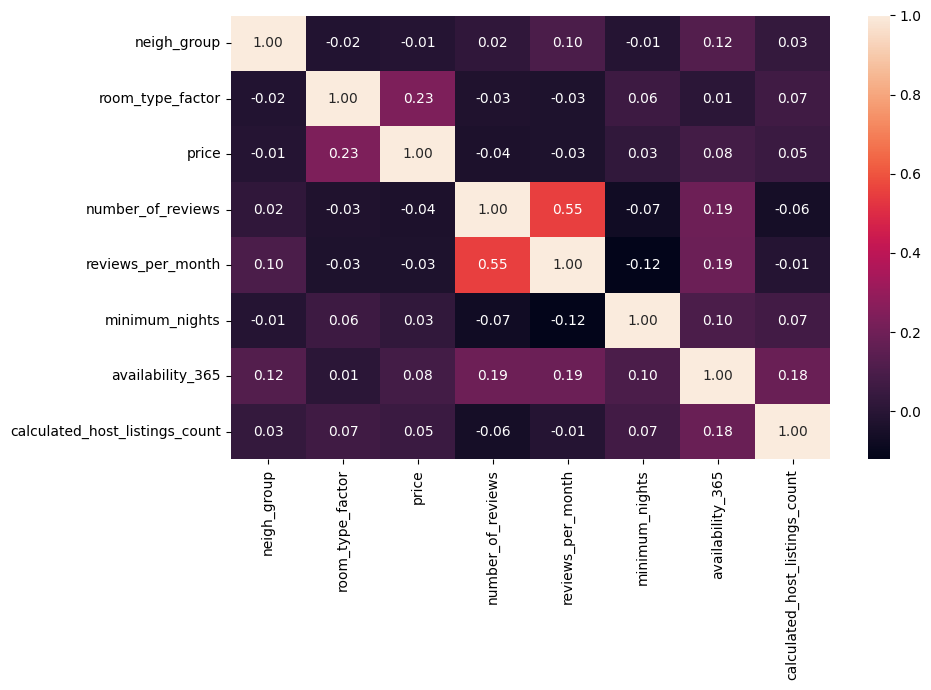

In [20]:
#TODO Correlation Analysis:
total_data['neigh_group'] = pd.factorize(total_data['neighbourhood_group'])[0]
total_data['room_type_factor'] = pd.factorize(total_data['room_type'])[0]

fig, axis = plt.subplots(figsize=(10, 7))

sns.heatmap(data=total_data[[
    'neigh_group', 
    'room_type_factor', 
    'price', 
    'number_of_reviews',
    'reviews_per_month', 
    'minimum_nights', 
    'availability_365',
    'calculated_host_listings_count'
    ]].corr(),
    annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

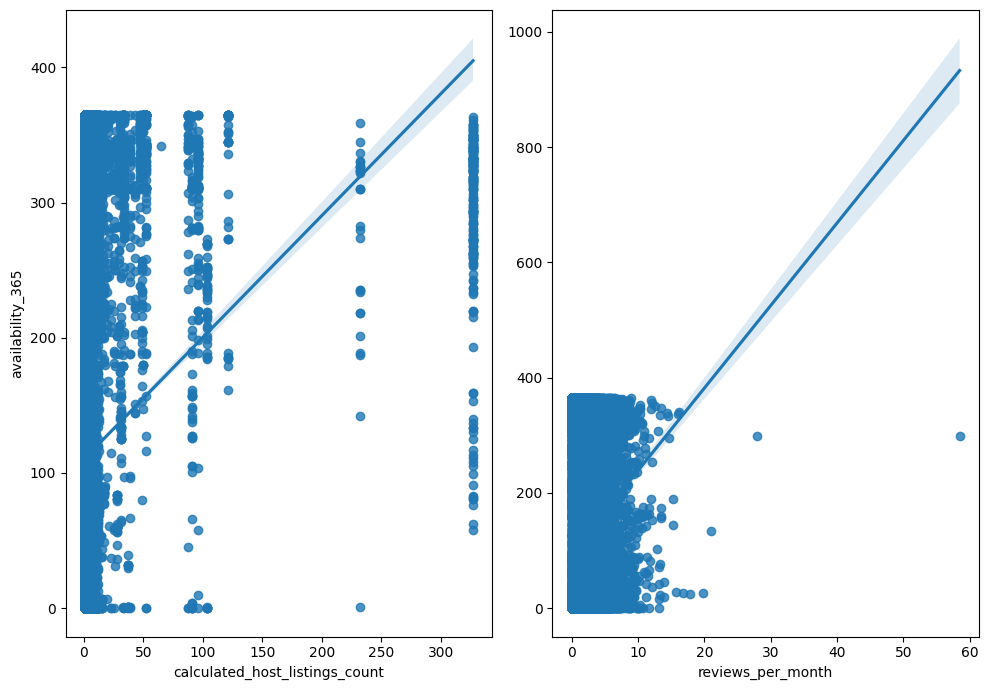

In [21]:
fig, axis = plt.subplots(figsize=(10, 7), ncols=2)

sns.regplot(ax=axis[0], data=total_data, x='calculated_host_listings_count', y='availability_365')
sns.regplot(ax=axis[1], data=total_data, x='reviews_per_month', y='availability_365').set_ylabel(None)

plt.tight_layout()
plt.show()

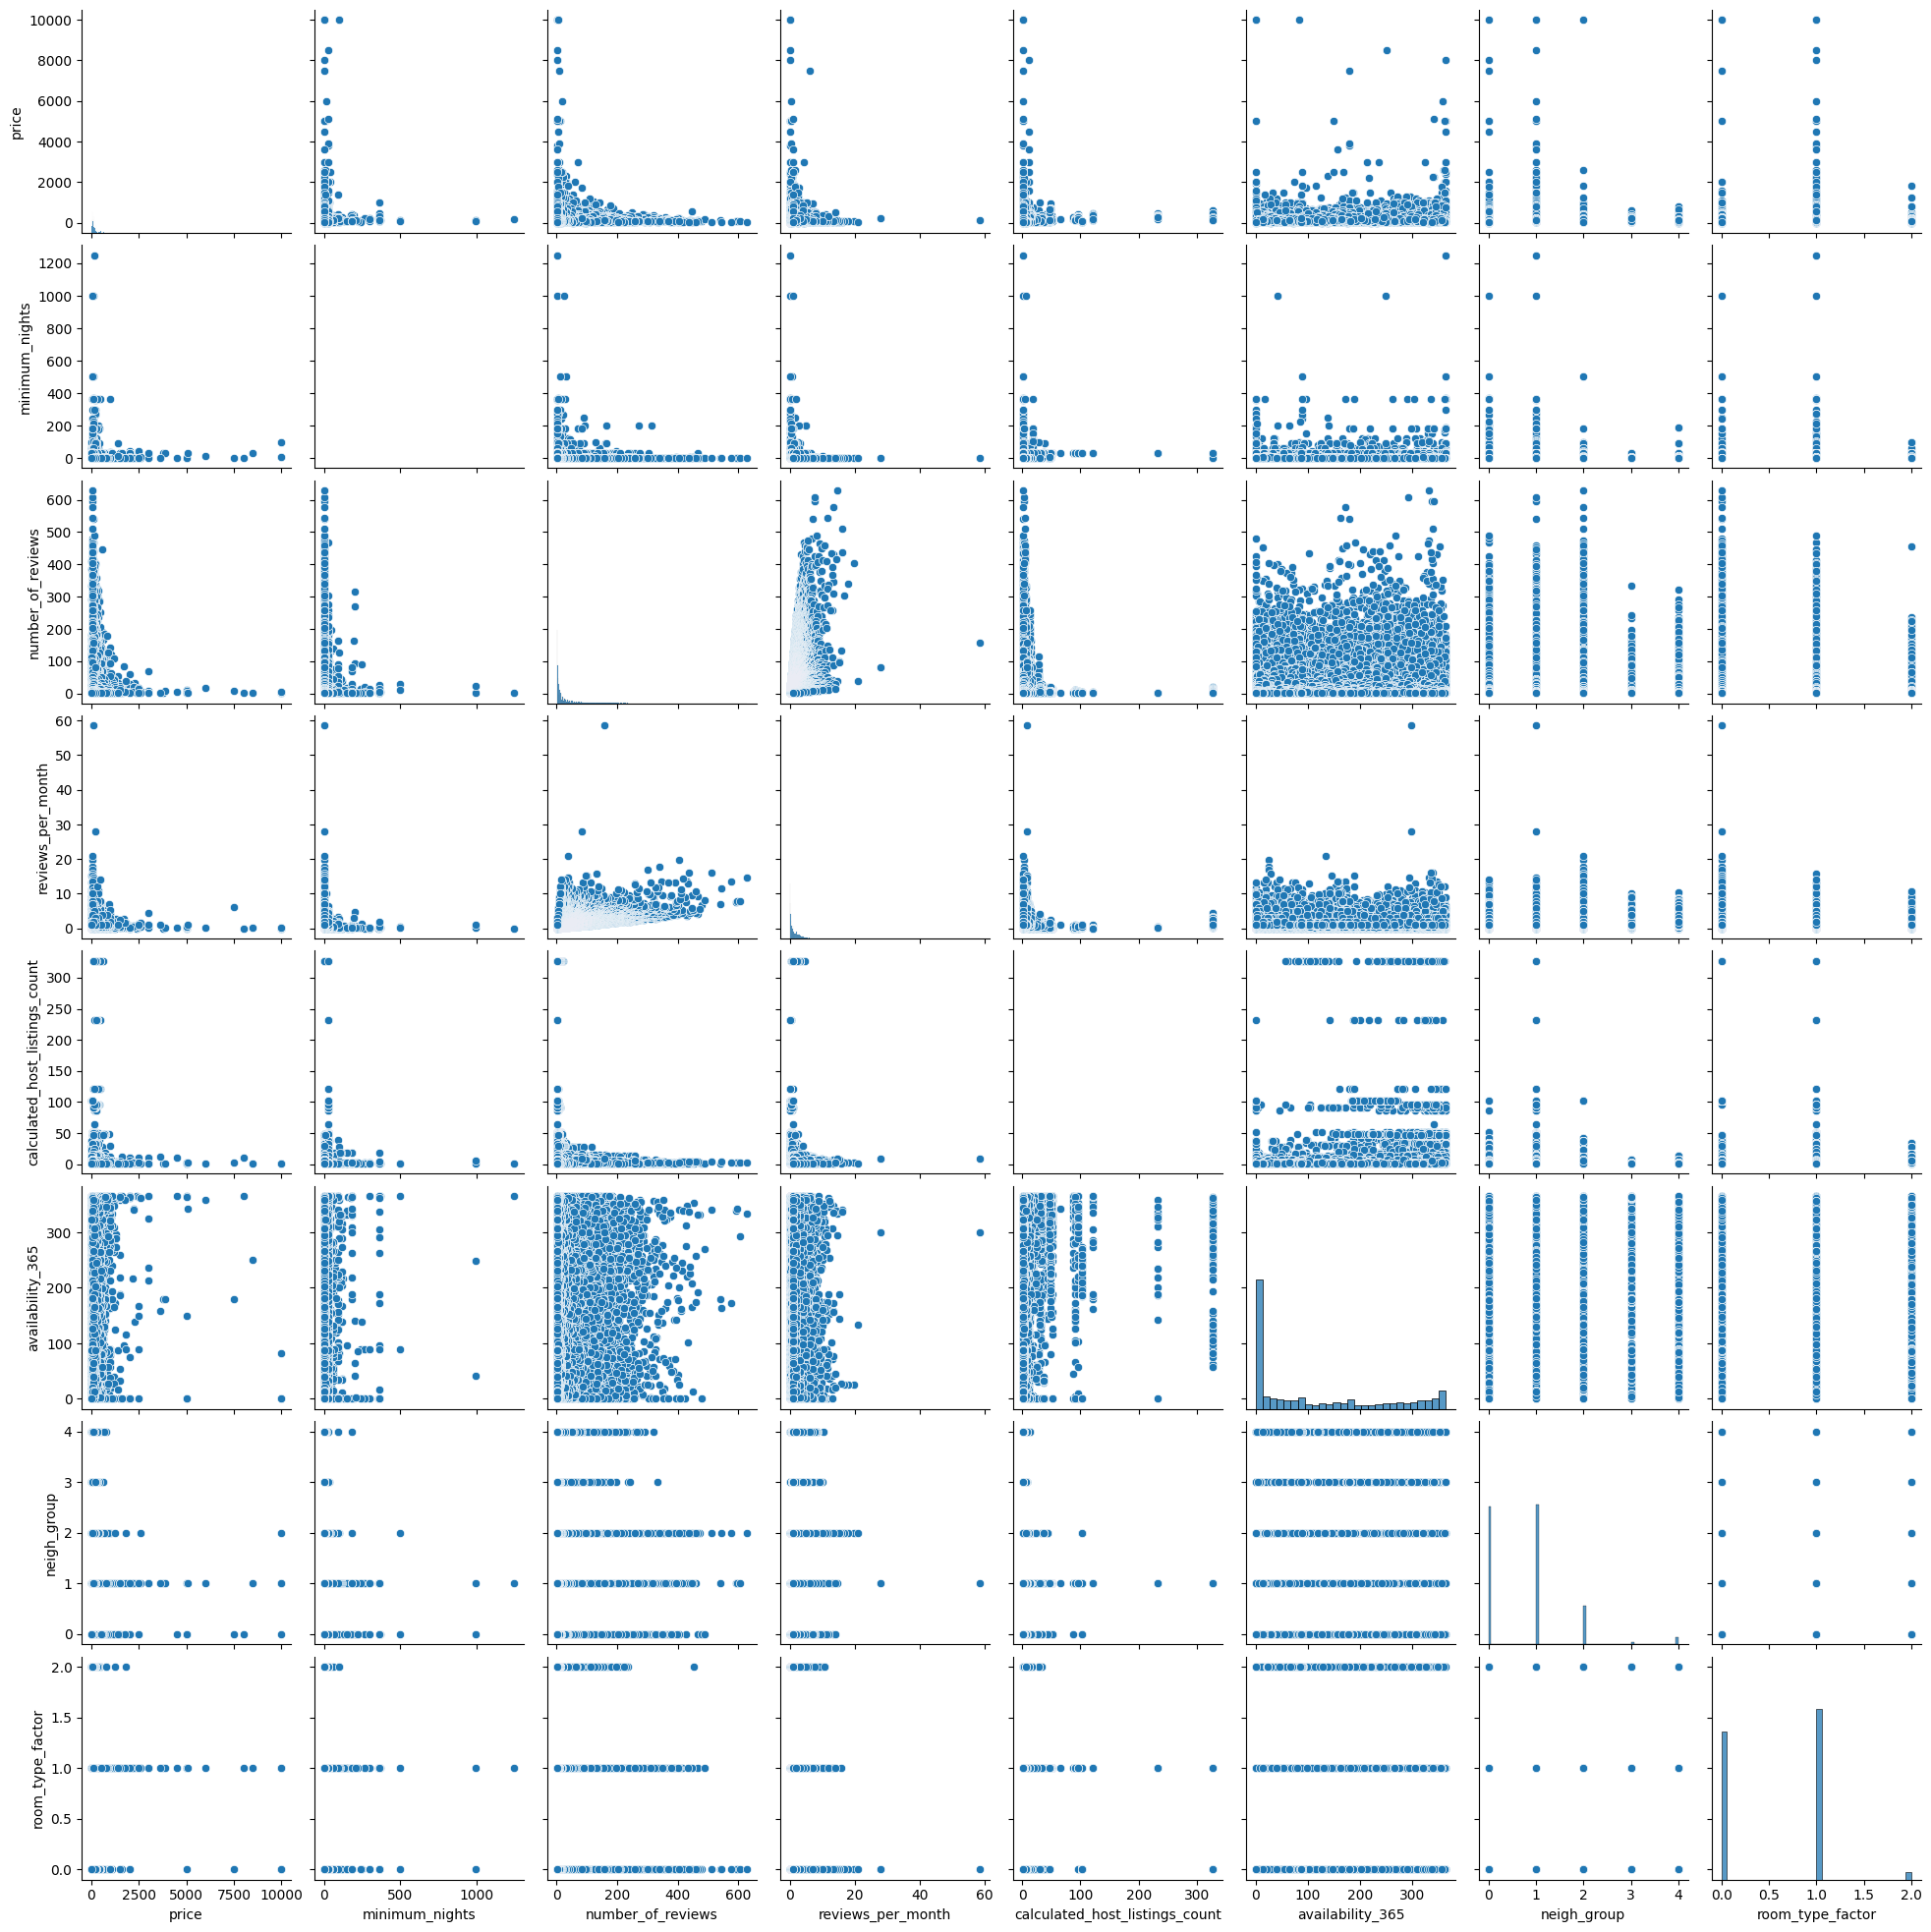

In [22]:
sns.pairplot(data=total_data)

In [23]:
#TODO Beginnig of Feature Analysis:
total_data.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neigh_group,room_type_factor
count,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.00000
mean,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888,0.778158,0.56700
std,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636,0.852813,0.53766
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.00000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000,0.000000,0.00000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000,1.000000,1.00000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000,1.000000,1.00000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,4.000000,2.00000


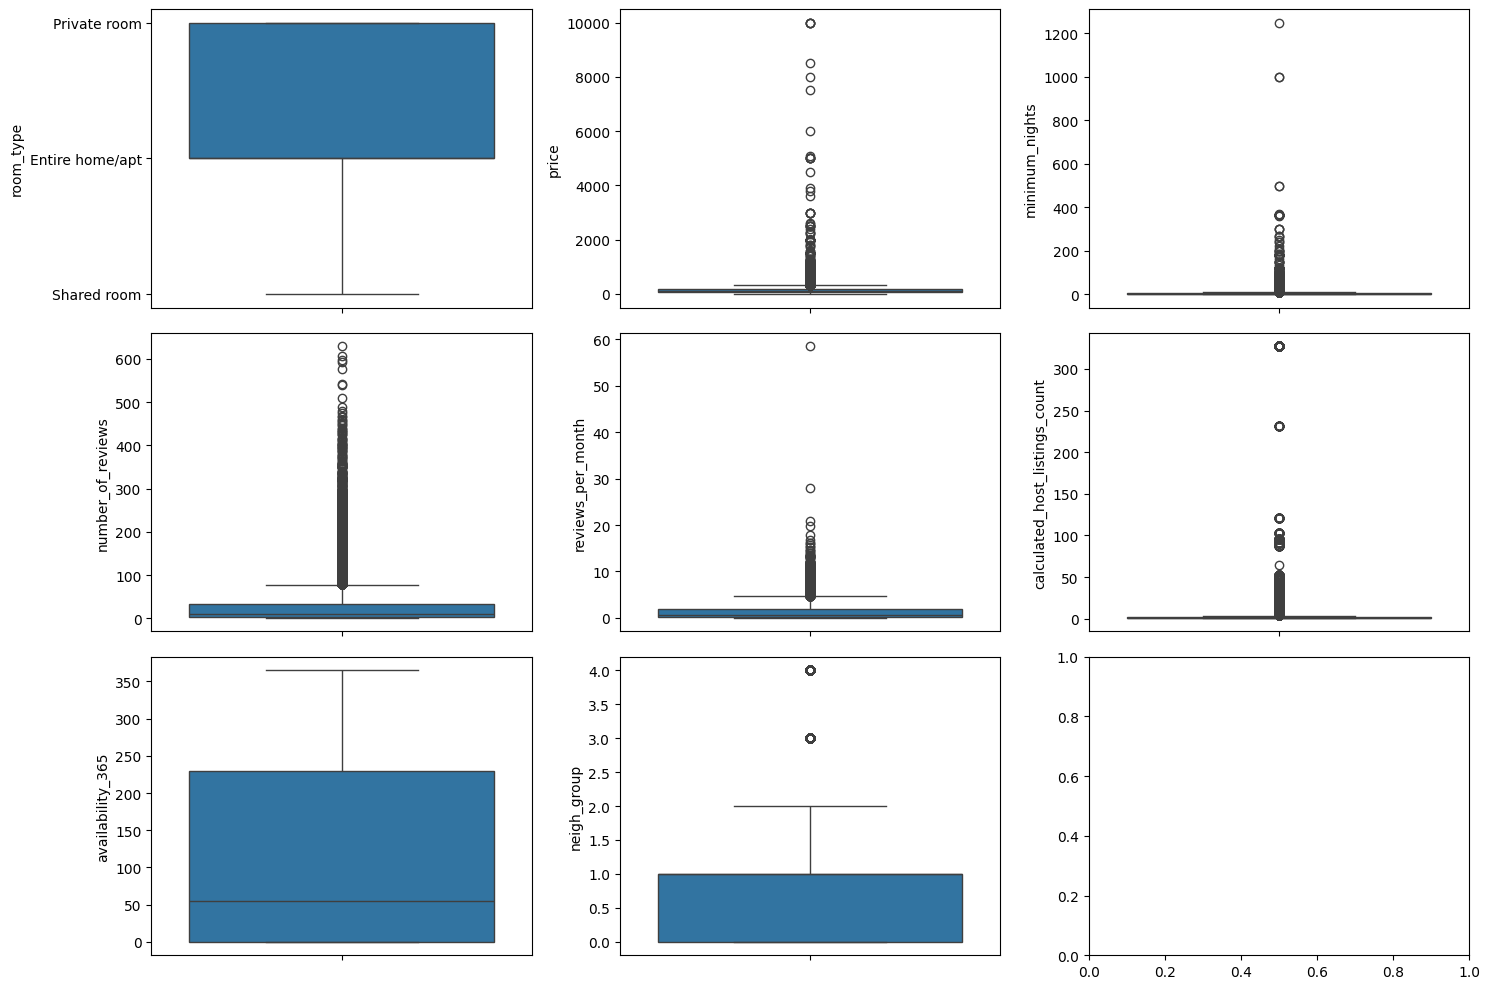

In [24]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=total_data, y='room_type')
sns.boxplot(ax=axis[0, 1], data=total_data, y='price')
sns.boxplot(ax=axis[0, 2], data=total_data, y='minimum_nights')
sns.boxplot(ax=axis[1, 0], data=total_data, y='number_of_reviews')
sns.boxplot(ax=axis[1, 1], data=total_data, y='reviews_per_month')
sns.boxplot(ax=axis[1, 2], data=total_data, y='calculated_host_listings_count')
sns.boxplot(ax=axis[2, 0], data=total_data, y='availability_365')
sns.boxplot(ax=axis[2, 1], data=total_data, y='neigh_group')

plt.tight_layout()
plt.show()

In [25]:
nights_stats = total_data['minimum_nights'].describe()
print(f"Minimum night stats: {nights_stats}\n")

price_stats = total_data['price'].describe()
print(f"Price stats: {price_stats}")

Minimum night stats: count    38843.000000
mean         5.868059
std         17.384784
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Price stats: count    38843.000000
mean       142.317947
std        196.945624
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64


In [26]:
# Minimum Nights Interquartile ranges
nights_iqr = nights_stats['75%'] - nights_stats['25%']

upper_nights = nights_stats['75%'] + 1.5 * nights_iqr
lower_nights= nights_stats['25%'] - 1.5 * nights_iqr

# Price Interquartile range
price_iqr = price_stats['75%'] - price_stats['25%']
upper_price = price_stats['75%'] + 1.5 * price_iqr

print(f"The upper and lower night limits for finding outliers are {round(upper_nights, 2)} and {round(lower_nights, 2)}, with an interquartile range of {round(nights_iqr, 2)}")
print(f"The upper and lower price limits for finding outliers are {round(upper_price, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower night limits for finding outliers are 8.5 and -3.5, with an interquartile range of 3.0
The upper and lower price limits for finding outliers are 321.5, with an interquartile range of 101.0


In [27]:
total_data[total_data["minimum_nights"] > 400]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neigh_group,room_type_factor
5767,Manhattan,Greenwich Village,Entire home/apt,180,1250,2,0.03,1,365,1,1
7355,Queens,Long Island City,Entire home/apt,134,500,30,0.57,1,90,2,1
11193,Brooklyn,Crown Heights,Private room,50,500,10,0.22,1,365,0,0
13404,Manhattan,Harlem,Entire home/apt,99,999,2,0.07,1,42,1,1
26341,Brooklyn,Williamsburg,Private room,79,999,24,1.12,6,249,0,0


In [28]:
#TODO filter out outliers in minimum_nights and prices:
total_data = total_data[
    (total_data['minimum_nights'] >= lower_nights) &
    (total_data['minimum_nights'] <= upper_nights)
]

total_data = total_data[total_data['price'] <= upper_price]

In [29]:
print(total_data['minimum_nights'].describe(), "\n")
print(total_data['price'].describe())

count    32494.000000
mean         2.569028
std          1.599275
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: minimum_nights, dtype: float64 

count    32494.000000
mean       117.229365
std         65.062193
min          0.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        321.000000
Name: price, dtype: float64


In [30]:
# Removed Null values in data initialization process
total_data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neigh_group                       0
room_type_factor                  0
dtype: int64

In [31]:
#TODO inference of new features
total_data['reviews_per_year'] = total_data['reviews_per_month'] * 12

# Tells whether host is a multi listing host or solo listing host
total_data['host_type'] = total_data['calculated_host_listings_count'].apply(lambda x: "solo" if x == 1 else "multi")

In [32]:
total_data.head(10)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neigh_group,room_type_factor,reviews_per_year,host_type
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,0,0,2.52,multi
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,1,1,4.56,multi
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,0,1,55.68,solo
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129,1,1,7.08,solo
7,Manhattan,Hell's Kitchen,Private room,79,2,430,3.47,1,220,1,0,41.64,solo
8,Manhattan,Upper West Side,Private room,79,2,118,0.99,1,0,1,0,11.88,solo
9,Manhattan,Chinatown,Entire home/apt,150,1,160,1.33,4,188,1,1,15.96,multi
10,Manhattan,Upper West Side,Entire home/apt,135,5,53,0.43,1,6,1,1,5.16,solo
11,Manhattan,Hell's Kitchen,Private room,85,2,188,1.50,1,39,1,0,18.00,solo
12,Brooklyn,South Slope,Private room,89,4,167,1.34,3,314,0,0,16.08,multi


In [ ]:
from sklearn.model_selection import train_test_split

#TODO: Create train and test datasets for safe feature extraction
total_data['host_type_factor'] = total_data['host_type'].map({'solo': 0, 'multi': 1})

num_variables = [
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "neigh_group",
    "reviews_per_year",
    "room_type_factor",
    "host_type_factor"
]

# Divide the dataset into training and test
X = total_data.drop('price', axis=1)[num_variables]
y = total_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neigh_group,reviews_per_year,room_type_factor,host_type_factor
8524,4,87,1.75,1,96,0,21.00,0,0
24415,2,3,0.13,3,364,2,1.56,0,1
11085,5,74,1.61,2,0,1,19.32,0,1
1723,7,4,0.05,1,36,0,0.60,1,0
3206,3,7,0.11,1,310,1,1.32,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#TODO: Use MinMax method to scale values correctly.
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index=X_train.index, columns=num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=num_variables)

X_train_scal.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neigh_group,reviews_per_year,room_type_factor,host_type_factor
8524,0.428571,0.136943,0.062276,0.000000,0.263014,0.00,0.062276,0.0,0.0
24415,0.142857,0.003185,0.004295,0.006135,0.997260,0.50,0.004295,0.0,1.0
11085,0.571429,0.116242,0.057266,0.003067,0.000000,0.25,0.057266,0.0,1.0
1723,0.857143,0.004777,0.001432,0.000000,0.098630,0.00,0.001432,0.5,0.0
3206,0.285714,0.009554,0.003579,0.000000,0.849315,0.25,0.003579,0.0,0.0


In [36]:
from sklearn.feature_selection import f_regression, SelectKBest

selection_model = SelectKBest(score_func=f_regression, k=5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])

X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,neigh_group,room_type_factor,host_type_factor
0,4.0,1.0,0.0,0.0,0.0
1,2.0,3.0,2.0,0.0,1.0
2,5.0,2.0,1.0,0.0,1.0
3,7.0,1.0,0.0,1.0,0.0
4,3.0,1.0,1.0,0.0,0.0


In [37]:
X_test_sel.head()

,minimum_nights,calculated_host_listings_count,neigh_group,room_type_factor,host_type_factor
0,2.0,1.0,2.0,1.0,0.0
1,4.0,1.0,1.0,1.0,0.0
2,3.0,1.0,1.0,1.0,0.0
3,2.0,1.0,1.0,0.0,0.0
4,3.0,2.0,1.0,0.0,1.0


In [38]:
X_train_sel['price'] = list(y_train)
X_test_sel['price'] = list(y_test)